In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
df = pd.read_excel("natural_gas.xlsx")

In [3]:
df.head()

,Consumption,Temperature
0,551547920.0,6.741935
1,551886440.0,5.857143
2,513182950.0,7.225806
3,281495382.0,12.566667
4,138625166.0,17.225806


In [4]:
consumption = df["Consumption"]

<Axes: >

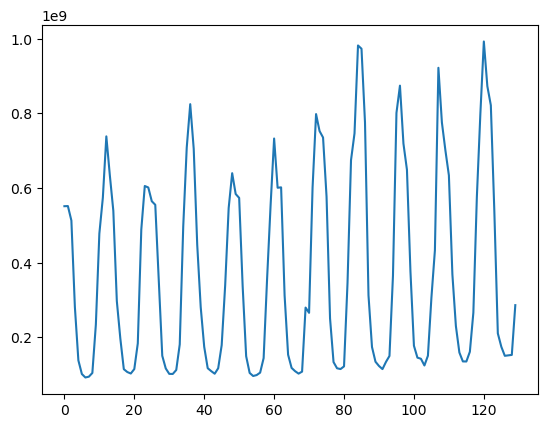

In [5]:
consumption.plot()

<Axes: >

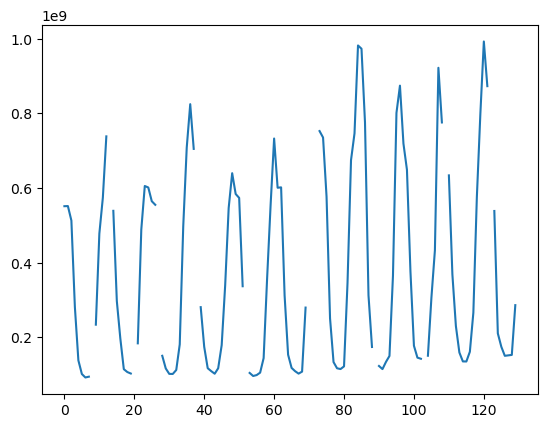

In [6]:
# Generating Na values

np.random.seed(0)
ix = np.random.choice([False, True], size=consumption.size, p=[0.9, 0.1])
consumption[ix] = np.nan
consumption.plot()

In [7]:
# generate missing values
! pip install pmdarima

<Axes: >

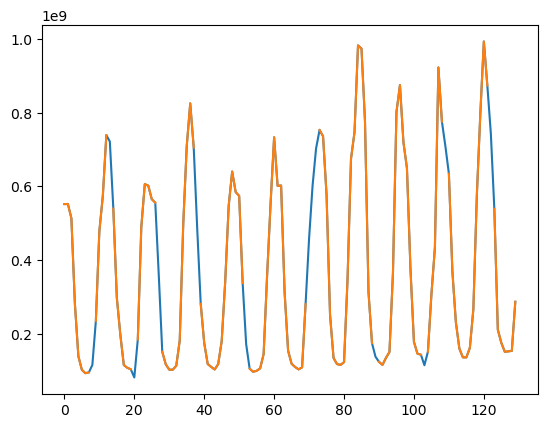

In [8]:
consumption_interpolated = consumption.interpolate("polynomial", order = 2)
consumption_interpolated.plot()
consumption.plot()

In [9]:
df.head()

,Consumption,Temperature
0,551547920.0,6.741935
1,551886440.0,5.857143
2,513182950.0,7.225806
3,281495382.0,12.566667
4,138625166.0,17.225806


In [10]:
# Standardization process
from sklearn.preprocessing import StandardScaler
df = pd.read_excel("natural_gas.xlsx")

scaler = StandardScaler()
scaler.fit(df.iloc[:-12, :])

df = scaler.transform(df)


#df = pd.read_excel("natural_gas.xlsx")
#mu = df.iloc[: -12, :].mean()
#sigma = df.iloc[: -12, :].std()
#df = (df - mu)/ sigma

In [11]:
def make_data(data: np.ndarray, lag: int = 12):
    """
    Splits time series data into lagged features (X) and targets (y).

    Args:
        data (np.ndarray): The time series data.
        lag (int): The lag interval, default is 12.

    Returns:
        Tuple[np.ndarray, np.ndarray]: 
            - X (np.ndarray): The array containing lagged features.
            - y (np.ndarray): The array containing target values to predict.
    """
    X = []
    y = []

    # Iterate over the data to create lagged features and targets.
    # Convert lists to NumPy arrays and return them.
    for i in range(len(data) - lag):
        X.append(data[i : i + lag])  
        y.append(data[i + lag])      
   
    return np.array(X), np.array(y)

# Generate the lagged dataset using the first column of the DataFrame.
X, y = make_data(df[:, 0], lag=12)


X = X[..., np.newaxis]


print(X.shape)  
print(y.shape)  


(118, 12)
(118,)


In [12]:
X_train = X[: -12]
y_train = y[: -12]
X_test = X[-12:]
y_test = y[-12:]

In [13]:
# create model with Machine Learning 

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score


mdl = GradientBoostingRegressor()
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)
print(r2_score(y_test, y_pred))


0.9137822989378568


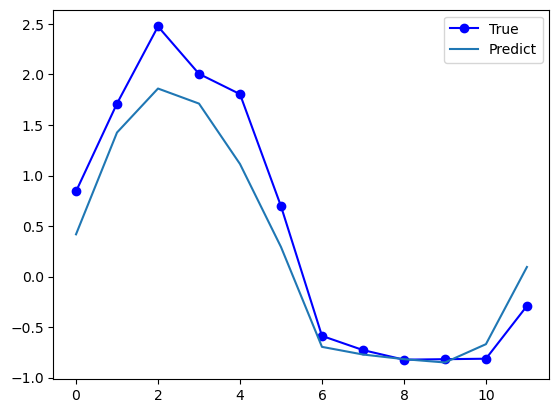

In [14]:
# data visualization
plt.plot(y_test, "-ob", label = "True")
plt.plot(y_pred, label = "Predict")
plt.legend()

In [27]:

def make_data(data: np.ndarray, lag: int = 12):
    """
    Splits time series data into lagged features (X) and corresponding targets (y).

    Args:
        data (np.ndarray): The time series data as a 1D NumPy array.
        lag (int): The number of time steps to use for the lagged features. Default is 12.

    Returns:
        Tuple[np.ndarray, np.ndarray]: 
            - X (np.ndarray): 2D array where each row is a sequence of lagged time steps.
            - y (np.ndarray): 1D array of target values, each corresponding to the subsequent time step after the lagged sequence.
    """
    X = []  
    y = []  

    # Loop through the data to generate the lagged sequences and corresponding targets.
    for i in range(len(data) - lag):
        X.append(data[i : i + lag])  
        y.append(data[i + lag])      

    
    return np.array(X), np.array(y)


X, y = make_data(df[:, 0], lag=12)

# Reshape X t for  expecting 3D input.
X = X[..., np.newaxis]

# Print the shapes of X and y to verify the structure of the data.
print(X.shape)  
print(y.shape)  


(118, 12, 1)
(118,)


In [18]:
# define train and test datas
X_train = X[:-12]
y_train = y[:-12]
X_test = X[-12:]
y_test = y[-12:]

In [20]:
# create  deep learning model

mdl = keras.Sequential()
mdl.add(layers.LSTM(128, input_shape = X_train.shape[1:]))
mdl.add(layers.Dense(128, activation = "relu"))
mdl.add(layers.Dense(1, activation = "linear"))

mdl.compile(optimizer = "adam", loss = "mse", metrics = ["mape"])
mdl.fit(X_train, y_train, epochs = 100, verbose = 0)



C:\Users\Hefes\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
# Predict the target values for the test set using the trained model.
y_pred = mdl.predict(X_test)
print(r2_score(y_test, y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
0.9043683030205397


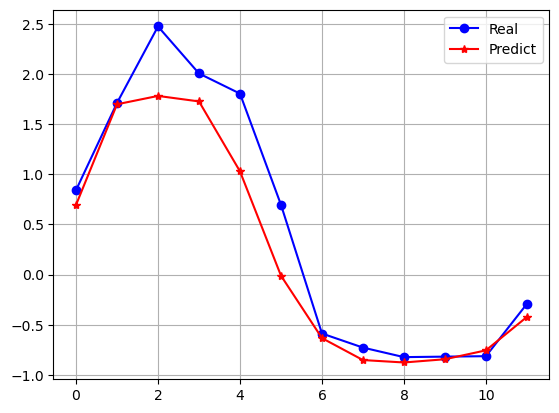

In [23]:
# data visualization
plt.plot(y_test, "-ob", label = "Real")
plt.plot(y_pred, "-*r", label = "Predict")
plt.legend()
plt.grid()